## YΣ19 Artificial Intelligence II
# Homework 2

### Iglezou Myrto - 111520170038

# Question 5

In [1]:
import pandas as pd 
from pandas import DataFrame, read_csv

In [19]:
import gdown
url = 'https://drive.google.com/file/d/1dTIWNpjlrnTQBIQtaGOh0jCRYZiAQO79/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
output = "twitterData.csv"
gdown.download(path, output, quiet=False)
twitterData = pd.read_csv("/content/twitterData.csv")
df = pd.DataFrame(data=twitterData)
df.head(5)

NameError: name 'download' is not defined

In [ ]:
X = df['text']
y = df['target']

### Original text

In [ ]:
X

0                                        #brokenpromises... 
1          David Carradine  so sad. Thai's law not sure i...
2            A @ 415 B @ 425. Tell your bro i say congrats! 
3                                  @littlefluffycat  Indeed.
4          Completed Race 4 Life in 58mins with girlies f...
                                 ...                        
1279995    @zawhtutwin watching cartoon and cry? oh i do ...
1279996                                 is eating mcdonalds 
1279997    @BestSoyLatte So sorry to hear about your car....
1279998    @leesherry you have done what you could. Forgi...
1279999              i should b sleepin  i hate 8am's!!!!!!!
Name: text, Length: 1280000, dtype: object

## Clean Data

### Removing the scpecial characters

In [ ]:
import re

def RemoveSpecialCharacters(x):
    x = re.sub(r'[^\w]+', " ", x)
    return x

In [ ]:
X = X.apply(lambda x: RemoveSpecialCharacters(x) )
X 

0                                            brokenpromises 
1          David Carradine so sad Thai s law not sure if ...
2                  A 415 B 425 Tell your bro i say congrats 
3                                    littlefluffycat Indeed 
4          Completed Race 4 Life in 58mins with girlies f...
                                 ...                        
1279995     zawhtutwin watching cartoon and cry oh i do t...
1279996                                 is eating mcdonalds 
1279997     BestSoyLatte So sorry to hear about your car ...
1279998     leesherry you have done what you could Forgiv...
1279999                     i should b sleepin i hate 8am s 
Name: text, Length: 1280000, dtype: object

### Lemmatize

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

X = X.apply(lambda x: WordNetLemmatizer().lemmatize(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
X

0                                            brokenpromises 
1          David Carradine so sad Thai s law not sure if ...
2                  A 415 B 425 Tell your bro i say congrats 
3                                    littlefluffycat Indeed 
4          Completed Race 4 Life in 58mins with girlies f...
                                 ...                        
1279995     zawhtutwin watching cartoon and cry oh i do t...
1279996                                 is eating mcdonalds 
1279997     BestSoyLatte So sorry to hear about your car ...
1279998     leesherry you have done what you could Forgiv...
1279999                     i should b sleepin i hate 8am s 
Name: text, Length: 1280000, dtype: object

### Removing the upercase

In [ ]:
X = X.apply(lambda x: x.lower())

In [ ]:
X

0                                            brokenpromises 
1          david carradine so sad thai s law not sure if ...
2                  a 415 b 425 tell your bro i say congrats 
3                                    littlefluffycat indeed 
4          completed race 4 life in 58mins with girlies f...
                                 ...                        
1279995     zawhtutwin watching cartoon and cry oh i do t...
1279996                                 is eating mcdonalds 
1279997     bestsoylatte so sorry to hear about your car ...
1279998     leesherry you have done what you could forgiv...
1279999                     i should b sleepin i hate 8am s 
Name: text, Length: 1280000, dtype: object

### Removing the stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords2

stopwords =  set(stopwords2.words('english'))

X = X.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X

0                                             brokenpromises
1          david carradine sad thai law sure fowl play ma...
2                            415 b 425 tell bro say congrats
3                                     littlefluffycat indeed
4          completed race 4 life 58mins girlies work fun ...
                                 ...                        
1279995    zawhtutwin watching cartoon cry oh time gets e...
1279996                                     eating mcdonalds
1279997      bestsoylatte sorry hear car definition bad news
1279998    leesherry done could forgiveness process reali...
1279999                                   b sleepin hate 8am
Name: text, Length: 1280000, dtype: object

## Split data

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify = y)

## Vectorize the Data (tfidf)

In [ ]:
def vectorizeData(X_train,X_test,vectorizer):
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    return X_train,X_test

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidfVectorizer = TfidfVectorizer(max_df=1.0,min_df=1)
tfidf_train,tfidf_test = vectorizeData(X_train,X_test,tfidfVectorizer)

## Cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf_lr = LogisticRegression( max_iter=1000)
scores = cross_val_score(clf_lr, tfidf_train, y_train, cv=10, n_jobs=4)

In [ ]:
scores

array([0.78318359, 0.78175781, 0.78188477, 0.78207031, 0.78143555,
       0.78361328, 0.78102539, 0.78173828, 0.78369141, 0.78208984])

In [ ]:
scores.mean()

0.7822490234374999

In [ ]:
from sklearn.metrics import classification_report
clf_lr.fit(tfidf_train, y_train)
y_predict = clf_lr.predict(tfidf_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78    127878
           4       0.77      0.80      0.79    128122

    accuracy                           0.78    256000
   macro avg       0.78      0.78      0.78    256000
weighted avg       0.78      0.78      0.78    256000



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.ylim([1.5, -.5])
    plt.show()

## Confusion Matrix

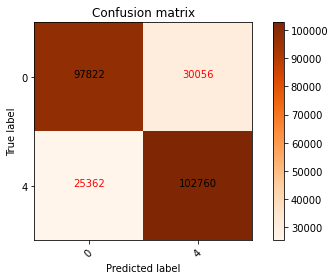

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict, labels=[0, 4])
plot_confusion_matrix(cm, classes=['0', '4'])

## Grid Search

In [ ]:
import warnings
warnings.filterwarnings("ignore") # warning for iterations

parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter':[100,1000,10000]}

grid = GridSearchCV(clf_lr, parameters, refit=False,return_train_score=False,
                    scoring=['precision_macro','recall_macro','f1_macro'])
grid.fit(tfidf_train, y_train)  # fitting the model for grid search 
tempDf = pd.DataFrame(grid.cv_results_)


In [ ]:
tempDf[['param_solver','param_max_iter','mean_test_precision_macro','mean_test_recall_macro', 'mean_test_f1_macro']]

,param_solver,param_max_iter,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
0,newton-cg,100,0.782357,0.781567,0.781433
1,lbfgs,100,0.780982,0.780140,0.779995
2,liblinear,100,0.782356,0.781566,0.781432
3,sag,100,0.782360,0.781570,0.781436
4,saga,100,0.782361,0.781571,0.781437
5,newton-cg,1000,0.782357,0.781567,0.781433
6,lbfgs,1000,0.782366,0.781577,0.781443
7,liblinear,1000,0.782356,0.781566,0.781432
8,sag,1000,0.782358,0.781568,0.781434
9,saga,1000,0.782358,0.781568,0.781434


Best parameters in precision metric


In [ ]:
row = tempDf.iloc[tempDf[['mean_test_precision_macro']].idxmax()]
row[['param_solver','param_max_iter','mean_test_precision_macro']]

,param_solver,param_max_iter,mean_test_precision_macro
6,lbfgs,1000,0.782366


Best parameters in recall metric

In [ ]:
row = tempDf.iloc[tempDf[['mean_test_recall_macro']].idxmax()]
row[['param_solver','param_max_iter','mean_test_recall_macro']]

,param_solver,param_max_iter,mean_test_recall_macro
6,lbfgs,1000,0.781577


Best parameters in F-measure metric

In [ ]:
row = tempDf.iloc[tempDf[['mean_test_f1_macro']].idxmax()]
row[['param_solver','param_max_iter','mean_test_f1_macro']]

,param_solver,param_max_iter,mean_test_f1_macro
6,lbfgs,1000,0.781443
